In [7]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import math
import time


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [13]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes


faceProto = "./age,gendernet/opencv_face_detector.pbtxt"
faceModel = "./age,gendernet/opencv_face_detector_uint8.pb"

ageProto = "./age,gendernet/age_deploy.prototxt"
ageModel = "./age,gendernet/age_net.caffemodel"

genderProto = "./age,gendernet/gender_deploy.prototxt"
genderModel = "./age,gendernet/gender_net.caffemodel"

ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)
faceNet = cv2.dnn.readNet(faceModel, faceProto)

Gender : Male, conf = 0.930
Age Output : [[1.2676562e-04 5.2314172e-03 8.4961265e-01 4.4403326e-02 9.3587250e-02
  6.7194505e-03 2.4799677e-04 7.1145565e-05]]
Age : (8-12), conf = 0.850
Gender : Male, conf = 0.980
Age Output : [[1.4381364e-07 2.3872570e-05 6.4257336e-01 4.0567853e-02 3.1668589e-01
  1.3851284e-04 5.2659225e-06 5.0404678e-06]]
Age : (8-12), conf = 0.643


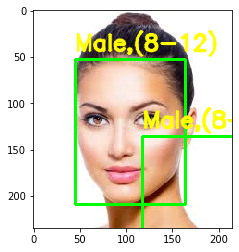

In [21]:
frameFace, bboxes = getFaceBox(faceNet, frame)
for bbox in bboxes:
    padding = 100
    face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

    blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    genderNet.setInput(blob)
    genderPreds = genderNet.forward()
    gender = genderList[genderPreds[0].argmax()]
    print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

    ageNet.setInput(blob)
    agePreds = ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print("Age Output : {}".format(agePreds))
    print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

    label = "{},{}".format(gender, age)
    cv2.putText(frameFace, label, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
    # cv.imwrite("age-gender-out-{}".format(args.input),frameFace)
    
imshow('', frameFace)

# data

In [16]:
image = cv2.imread("images/face.jpg")
frame = image.copy()

# box찾기

I found 1 face(s) in this photograph.
(82, 167, 211, 38)


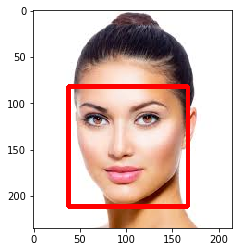

In [17]:
face_locations = face_recognition.face_locations(frame)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    print(face_location)
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

# 특징점 찾기

In [23]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

Number of faces detected: 1
[(37, 79) (162, 203)]
Detection 0: Left: 37 Top: 79 Right: 162 Bottom: 203


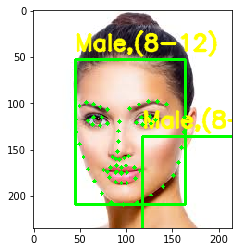

In [26]:
frame =  cv2.imread("./images/face.jpg")

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frameFace, (s[0], s[1]), 2, (0, 255, 0), -1)
        
imshow('', frameFace)
    

# emotion

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import sys
from keras.models import load_model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers

Using TensorFlow backend.


In [28]:
def load_detection_model(model_path):
    detection_model = cv2.CascadeClassifier(model_path)
    return detection_model

def detect_faces(detection_model, gray_image_array):
    return detection_model.detectMultiScale(gray_image_array, 1.3, 5)

def draw_bounding_box(face_coordinates, image_array, color):
    x, y, w, h = face_coordinates
    cv2.rectangle(image_array, (x, y), (x + w, y + h), color, 2)

def apply_offsets(face_coordinates, offsets):
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

def draw_text(coordinates, image_array, text, color, x_offset=0, y_offset=0,
                                                font_scale=0.5, thickness=2):
    x, y = coordinates[:2]
    cv2.putText(image_array, text, (x + x_offset, y + y_offset),
                cv2.FONT_HERSHEY_SIMPLEX,
                font_scale, color, thickness, cv2.LINE_AA)
    
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

# detector

In [35]:
detector = dlib.get_frontal_face_detector()

# emotion

In [37]:
emotion_model_path = './emotion/fer2013_big_XCEPTION.54-0.66.hdf5'
emotion_labels = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'sad',5:'surprise',6:'neutral'}

# loading models
emotion_classifier = load_model(emotion_model_path, compile=False)

emotion_target_size = emotion_classifier.input_shape[1:3]

# age, gender

In [38]:
ageProto = "./age,gendernet/age_deploy.prototxt"
ageModel = "./age,gendernet/age_net.caffemodel"

genderProto = "./age,gendernet/gender_deploy.prototxt"
genderModel = "./age,gendernet/gender_net.caffemodel"


ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)


# data preprocessing

In [39]:
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

Detection 0: Left: 37 Top: 79 Right: 162 Bottom: 203
Gender : Male, conf = 0.999


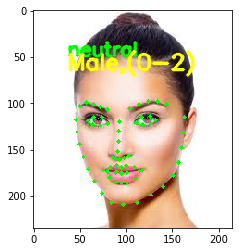

In [40]:
frame = cv2.imread("./images/face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# box 찾기
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        # 특징점 그리기
        for s in shape:
            cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        # 얼굴 영역 검출(=box)
        gray_face = gray[y1:y2, x1:x2]
        
        # emotion 모델
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)      
        
        # gender, age 모델
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        
        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)